# Pistachio Image Classification with CNN

This study aims to identify these two types of pistachios, which are frequently grown in Turkey, by classifying them via convolutional neural networks. Within the scope of the study, images of Kirmizi and Siirt pistachio types were obtained through the computer vision system. The pre-trained dataset includes a total of 2148 images, 1232 of Kirmizi type and 916 of Siirt type.

<img src=https://m.media-amazon.com/images/I/51PtpFmNEqS._AC_UF1000,1000_QL80_.jpg width=250>
<a href='https://www.mdpi.com/2079-9292/11/7/981'target=_blank>You can find detailed information about the data here.</a>

<a href='https://huggingface.co/spaces/ttugba/pistachio' target=_blank> Pistachio Image Classification App </a>

### Import Libraries

In [1]:
import tensorflow as tf
import cv2
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
labels=['Kirmizi_Pistachio','Siirt_Pistachio']
img_path='Pistachio_Image_Dataset/'

In [3]:
os.listdir('Pistachio_Image_Dataset/')

['Kirmizi_Pistachio', 'Siirt_Pistachio']

In [4]:
img_list=[] 
label_list=[] 
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [5]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [6]:
df.head()

,img,label
0,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
1,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
2,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
3,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
4,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio


In [7]:
df.sample(3)

,img,label
703,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
343,Pistachio_Image_Dataset/Kirmizi_Pistachio/kirm...,Kirmizi_Pistachio
1381,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio


In [8]:
df.shape

(2148, 2)

In [9]:
d={'Kirmizi_Pistachio':0,'Siirt_Pistachio':1}

In [10]:
df['encode_label']=df['label'].map(d)

In [11]:
df.tail()

,img,label,encode_label
2143,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio,1
2144,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio,1
2145,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio,1
2146,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio,1
2147,Pistachio_Image_Dataset/Siirt_Pistachio/siirt ...,Siirt_Pistachio,1


In [12]:
x = []
for img_path in df['img']:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (170, 170))   #Resizes the image to a shape of 170x170 using the OpenCV library's resize function
    img = img / 255.0    #Normalizes the pixel values of the image by dividing them by 255.0
    x.append(img)

In [13]:
x=np.array(x)

In [14]:
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [15]:
y=df['encode_label']

In [16]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2143    1
2144    1
2145    1
2146    1
2147    1
Name: encode_label, Length: 2148, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1718, 170, 170, 3)
(430, 170, 170, 3)
(1718,)
(430,)


### Data Visualization

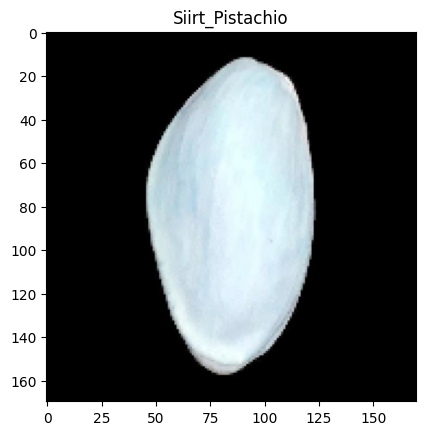

In [20]:
plt.imshow(x_train[1500])
plt.title(labels[int(y_train[1500])]);

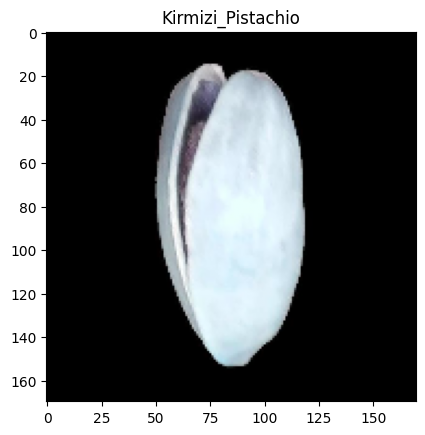

In [21]:
plt.imshow(x_train[300])
plt.title(labels[int(y_train[300])]);

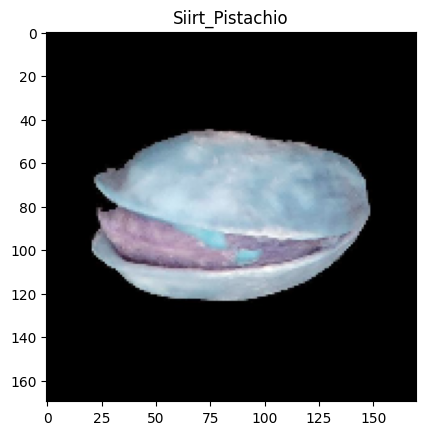

In [22]:
plt.imshow(x_train[1700])
plt.title(labels[int(y_train[1700])]);

### CNN Convolutional Neural Networks

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten

In [24]:
model=Sequential()
model.add(Input(shape=(170,170,3)))

#1.layer
model.add(Conv2D(70,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#2.layer
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#3.layer
model.add(Conv2D(30,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#4.layer
model.add(Conv2D(20,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#5.layer
model.add(Conv2D(10,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128)) 
model.add(Dense(2,activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 643ms/step - accuracy: 0.6321 - loss: 0.6264 - val_accuracy: 0.8070 - val_loss: 0.4098
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 643ms/step - accuracy: 0.8105 - loss: 0.3894 - val_accuracy: 0.8163 - val_loss: 0.3859
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 632ms/step - accuracy: 0.8128 - loss: 0.4008 - val_accuracy: 0.8209 - val_loss: 0.3795
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 640ms/step - accuracy: 0.8463 - loss: 0.3497 - val_accuracy: 0.8326 - val_loss: 0.3852
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 672ms/step - accuracy: 0.8361 - loss: 0.3525 - val_accuracy: 0.8279 - val_loss: 0.3769
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 712ms/step - accuracy: 0.8457 - loss: 0.3377 - val_accuracy: 0.8465 - val_loss: 0.3859
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 656ms/step - accuracy: 0.8760 - loss: 0.2886 - val_accuracy: 0.8605 - val_loss: 0.3296
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 659ms/step - accuracy: 0.8758 - loss: 0.2759 - val_accu

Based on these outputs, we can observe that the model's performance improves as the training progresses. The accuracy values increase while the loss values decrease. This indicates that the model is aligning better with the training dataset and improving its generalization ability.

In [26]:
model.save('pistachiomodel.h5')

### Transfer Learning

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### VGG16 Model

In [28]:
data_dir='Pistachio_Image_Dataset/' 
img_width,img_height=224,224 

train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='training')

test_datagen=ImageDataGenerator(rescale=1/255) 

test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='validation')

base_model=VGG16(weights='imagenet',input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainabel=False 
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=10,validation_data=test_datagenerator)

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1062s 20s/step - accuracy: 0.5564 - loss: 6.8769 - val_accuracy: 0.5734 - val_loss: 0.6903
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1068s 20s/step - accuracy: 0.5465 - loss: 0.6901 - val_accuracy: 0.5734 - val_loss: 0.6842
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1069s 20s/step - accuracy: 0.5975 - loss: 0.6796 - val_accuracy: 0.5734 - val_loss: 0.6846
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1163s 22s/step - accuracy: 0.5617 - loss: 0.6857 - val_accuracy: 0.5734 - val_loss: 0.6793
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1209s 22s/step - accuracy: 0.5869 - loss: 0.6791 - val_accuracy: 0.5734 - val_loss: 0.6856
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1209s 22s/step - accuracy: 0.5998 - loss: 0.6747 - val_accuracy: 0.5734 - val_loss: 0.6792
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 1191s 22s/step - accuracy: 0.5719 - loss: 0.6828 - val_accuracy: 0.5734 - val_loss: 0.6799
Epoch 8/10
54/

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │      25,691,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,220,549 (462.42 MB)

 Trainable params: 40,406,849 (154.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 80,813,700 (308.28 MB)

#### ResNet50 Model

In [21]:
data_dir='Pistachio_Image_Dataset/' 
img_width,img_height=224,224

train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='training')

test_datagen=ImageDataGenerator(rescale=1/255) 

test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='validation')

base_model=ResNet50(weights='imagenet',input_shape=(img_width,img_height,3))
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainabel=False 
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=5,validation_data=test_datagenerator)

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1050s 15s/step - accuracy: 0.7043 - loss: 0.6414 - val_accuracy: 0.5734 - val_loss: 0.6876
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 808s 15s/step - accuracy: 0.7587 - loss: 0.5299 - val_accuracy: 0.5734 - val_loss: 1.1790
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 827s 15s/step - accuracy: 0.8317 - loss: 0.4066 - val_accuracy: 0.5734 - val_loss: 1.2623
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 808s 15s/step - accuracy: 0.8503 - loss: 0.3388 - val_accuracy: 0.4266 - val_loss: 0.8473
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 798s 15s/step - accuracy: 0.9191 - loss: 0.2010 - val_accuracy: 0.4266 - val_loss: 0.8108


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1000)                │      25,636,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1024)                │       1,025,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,882,045 (304.73 MB)

 Trainable params: 26,609,641 (101.51 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 53,219,284 (203.02 MB)

#### Xception Model

In [21]:
data_dir='Pistachio_Image_Dataset/' 
img_width,img_height=224,224

train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)

train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='training')

test_datagen=ImageDataGenerator(rescale=1/255) 

test_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='validation')

base_model=Xception(weights='imagenet',input_shape=(img_width,img_height,3),include_top=False)
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainabel=False 
    
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_datagenerator,epochs=5,validation_data=test_datagenerator)

Found 1719 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1189s 19s/step - accuracy: 0.6785 - loss: 2.0132 - val_accuracy: 0.8695 - val_loss: 0.4391
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1142s 21s/step - accuracy: 0.9601 - loss: 0.1031 - val_accuracy: 0.9371 - val_loss: 0.4742
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1137s 21s/step - accuracy: 0.9695 - loss: 0.0977 - val_accuracy: 0.9790 - val_loss: 0.0585
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1020s 19s/step - accuracy: 0.9797 - loss: 0.0532 - val_accuracy: 0.9977 - val_loss: 0.0134
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 1040s 19s/step - accuracy: 0.9866 - loss: 0.0343 - val_accuracy: 0.9417 - val_loss: 0.2920


In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │     102,761,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 370,762,877 (1.38 GB)

 Trainable params: 123,569,449 (471.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 247,138,900 (942.76 MB)

Based on these outputs, we can say that the Xception model outperforms the other two models. The Xception model has better alignment with the training dataset and achieves lower loss values. Additionally, the ResNet50 and VGG16 models show low accuracy values on the validation dataset(val_accuracy), indicating limited generalization capabilities.